<h1>Importing Libraries</h1>

In [9]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

sns.set()
plt.style.use('ggplot')
%matplotlib inline

<h1>Importing Dataset</h1>

In [2]:
#import dataset
df = pd.read_csv('cardio_data.csv')       
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1


In [19]:
# information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [5]:
#description about dataset
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [6]:
df.shape

(68205, 17)

In [7]:
df.dtypes

id                       int64
age                      int64
gender                   int64
height                   int64
weight                 float64
ap_hi                    int64
ap_lo                    int64
cholesterol              int64
gluc                     int64
smoke                    int64
alco                     int64
active                   int64
cardio                   int64
age_years                int64
bmi                    float64
bp_category             object
bp_category_encoded     object
dtype: object

<h2>Checking for Missing Values</h2>

In [8]:
missing_values = df.isna().sum()
print(missing_values)

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64


<h2>Checking for Duplicates</h2>

In [9]:
duplicate_rows = df.duplicated()
duplicate_rows.unique() # if the array has only false if unqiue, then no duplicates are present.

array([False])

<h1>Checking for Outliers</h1>

<h3>Outliers based on weight</h3>

In [10]:
# Calculate Q1 and Q3
Q1 = df['weight'].quantile(0.25)
Q3 = df['weight'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['weight'] < lower_bound) | (df['weight'] > upper_bound)

# Get the rows with outliers
outlier_rows = df[outliers]

In [11]:
outlier_rows

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1,45,37.858302,Hypertension Stage 1,Hypertension Stage 1
62,81,20330,2,187,115.0,130,90,1,1,0,1,1,0,55,32.886271,Hypertension Stage 1,Hypertension Stage 1
83,114,19570,1,152,110.0,160,90,1,1,0,0,1,1,53,47.610803,Hypertension Stage 2,Hypertension Stage 2
195,267,22675,1,176,108.0,140,90,1,1,0,0,0,0,62,34.865702,Hypertension Stage 2,Hypertension Stage 2
262,366,17460,1,165,115.0,150,100,1,1,0,0,1,1,47,42.240588,Hypertension Stage 2,Hypertension Stage 2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68082,99799,19736,2,188,108.0,130,80,2,2,0,1,0,1,54,30.556813,Hypertension Stage 1,Hypertension Stage 1
68152,99925,21333,1,164,115.0,130,80,1,1,0,0,1,1,58,42.757287,Hypertension Stage 1,Hypertension Stage 1
68153,99930,23305,2,172,113.0,110,80,1,1,0,0,0,1,63,38.196322,Hypertension Stage 1,Hypertension Stage 1
68186,99972,17500,2,182,110.0,130,90,2,2,0,0,1,1,47,33.208550,Hypertension Stage 1,Hypertension Stage 1


In [12]:
outlier_indices = outlier_rows.index

# Use boolean indexing to keep only the non-outlier rows in 'df'
df = df[~df.index.isin(outlier_indices)]

In [13]:
df.shape

(66494, 17)

<h3>Outliers based on height</h3>

In [14]:
# Calculate Q1 and Q3
Q1 = df['height'].quantile(0.25)
Q3 = df['height'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (df['height'] < lower_bound) | (df['height'] > upper_bound)

# Get the rows with outliers
outlier_rows = df[outliers]

outlier_indices = outlier_rows.index

# Use boolean indexing to keep only the non-outlier rows in 'df'
df = df[~df.index.isin(outlier_indices)]

In [15]:
df.shape

(66051, 17)

<h1>Data Transformation</h1>

<h2>Renaming Variables for ease</h2>

In [16]:
new_column_names = {
    'ap_hi': 'Systolic_BP',
    'ap_lo': 'Diastolic_BP',
    'gluc': 'Glucose_Level',
    # Add more columns as needed
}

# Use the rename() method to rename the columns
df.rename(columns=new_column_names, inplace=True)

In [17]:
df.head(2)

,id,age,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,Glucose_Level,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2


<h2> 0-->Male,   1-->Female Encoding</h2>

In [18]:
value_mapping = {2: 0} # 0 represents MALE
                       # 1 represents FEMALE

# Use the .replace() method to perform the mapping
df['gender'] = df['gender'].replace(value_mapping)

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66051 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   66051 non-null  int64  
 1   age                  66051 non-null  int64  
 2   gender               66051 non-null  int64  
 3   height               66051 non-null  int64  
 4   weight               66051 non-null  float64
 5   Systolic_BP          66051 non-null  int64  
 6   Diastolic_BP         66051 non-null  int64  
 7   cholesterol          66051 non-null  int64  
 8   Glucose_Level        66051 non-null  int64  
 9   smoke                66051 non-null  int64  
 10  alco                 66051 non-null  int64  
 11  active               66051 non-null  int64  
 12  cardio               66051 non-null  int64  
 13  age_years            66051 non-null  int64  
 14  bmi                  66051 non-null  float64
 15  bp_category          66051 non-null 

<h1>Normalization and Standardization</h1>

In [20]:
df.head()

,id,age,gender,height,weight,Systolic_BP,Diastolic_BP,cholesterol,Glucose_Level,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,0,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,0,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


<h4>!!! We dont need any normalization and standardization since there arent extreme fluctuations in the useful data.</h4>

<h2>Dropping Unnecessry Columns</h2>

In [21]:
print(df.corr()["cardio"].abs().sort_values(ascending=False))

cardio           1.000000
Systolic_BP      0.434138
Diastolic_BP     0.341859
age              0.242754
age_years        0.242575
cholesterol      0.219714
bmi              0.188074
weight           0.174235
Glucose_Level    0.088327
active           0.038189
height           0.019619
smoke            0.019577
alco             0.010675
gender           0.003590
id               0.002778
Name: cardio, dtype: float64


<h2>Dimentionality Reduction</h2>

In [22]:
df.shape

(66051, 17)

In [23]:
#drop id since it has nothing to do with the disease
#drop weight since a better feature is already calculated using it
#drop height since a better feature is already calculated using it
#drop age since it is age in days and caluclated using age in years

columns_to_drop = ['id','height','age','weight']
df.drop(columns=columns_to_drop, inplace=True)

In [24]:
print(df.corr()["cardio"].abs().sort_values(ascending=False))

cardio           1.000000
Systolic_BP      0.434138
Diastolic_BP     0.341859
age_years        0.242575
cholesterol      0.219714
bmi              0.188074
Glucose_Level    0.088327
active           0.038189
smoke            0.019577
alco             0.010675
gender           0.003590
Name: cardio, dtype: float64


In [25]:
df.shape

(66051, 13)

In [26]:
df.head()

,gender,Systolic_BP,Diastolic_BP,cholesterol,Glucose_Level,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,1,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,1,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


In [27]:
#dropping this column since it is calculated from the already present bp_category
columns_to_drop = ['bp_category_encoded']
df.drop(columns=columns_to_drop, inplace=True)

In [28]:
df['bp_category'].unique()

array(['Hypertension Stage 1', 'Hypertension Stage 2', 'Normal',
       'Elevated'], dtype=object)

In [29]:
#Since we already have systolic and diastolic BPs, we dont need its categorization...
columns_to_drop = ['bp_category']
df.drop(columns=columns_to_drop, inplace=True)

In [30]:
df.shape

(66051, 11)

In [31]:
print(df.corr()["cardio"].abs().sort_values(ascending=False))

cardio           1.000000
Systolic_BP      0.434138
Diastolic_BP     0.341859
age_years        0.242575
cholesterol      0.219714
bmi              0.188074
Glucose_Level    0.088327
active           0.038189
smoke            0.019577
alco             0.010675
gender           0.003590
Name: cardio, dtype: float64


<h2>Using PCA</h2>

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=7)
pca.fit(df)

print(pca.explained_variance_ratio_)

[7.59655209e-01 1.08839876e-01 7.96149656e-02 4.83044514e-02
 1.34457659e-03 5.86669964e-04 5.26992340e-04]


In [33]:
pca.transform(df).shape

(66051, 7)

In [65]:
pca

PCA(n_components=7)

<h1>Data Validation</h1>

In [34]:
df.isnull().sum()

gender           0
Systolic_BP      0
Diastolic_BP     0
cholesterol      0
Glucose_Level    0
smoke            0
alco             0
active           0
cardio           0
age_years        0
bmi              0
dtype: int64

In [39]:
df.to_csv('Final_Dataset.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66051 entries, 0 to 68204
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gender         66051 non-null  int64  
 1   Systolic_BP    66051 non-null  int64  
 2   Diastolic_BP   66051 non-null  int64  
 3   cholesterol    66051 non-null  int64  
 4   Glucose_Level  66051 non-null  int64  
 5   smoke          66051 non-null  int64  
 6   alco           66051 non-null  int64  
 7   active         66051 non-null  int64  
 8   cardio         66051 non-null  int64  
 9   age_years      66051 non-null  int64  
 10  bmi            66051 non-null  float64
dtypes: float64(1), int64(10)
memory usage: 6.0 MB


<h5>So far the first phase has been completed.....</h5>

<h1>
Phase 2 (Visualization Starts from here)
</h1>

In [51]:
df=pd.read_csv('Final_Dataset.csv')

In [52]:
df.head(3)

,Unnamed: 0,gender,Systolic_BP,Diastolic_BP,cholesterol,Glucose_Level,smoke,alco,active,cardio,age_years,bmi
0,0,0,110,80,1,1,0,0,1,0,50,21.967120
1,1,1,140,90,3,1,0,0,1,1,55,34.927679
2,2,1,130,70,3,1,0,0,0,1,51,23.507805


In [54]:
columns_to_drop = ['Unnamed: 0']
df.drop(columns=columns_to_drop, inplace=True)

<h2>Univariate Analysis</h2>

<h3>Box Plot</h3>

<Axes: >

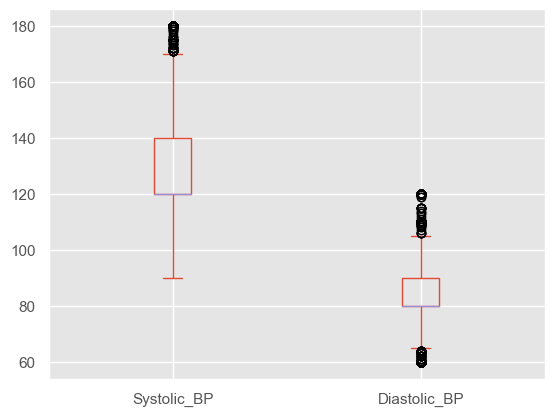

In [57]:
df[df.columns[1:3]].plot(kind = 'box')

Most of the Systolic BPs are around the Q1 which is 120. There are a few outliers having Systolic BP greater than 170. Similarly, most of the Diastolic BPs are around the Q1 which is 80. There are a few outliers having Systolic BP greater than 105 and some having it lower than 65. Both plots are Right skewed.

<Axes: >

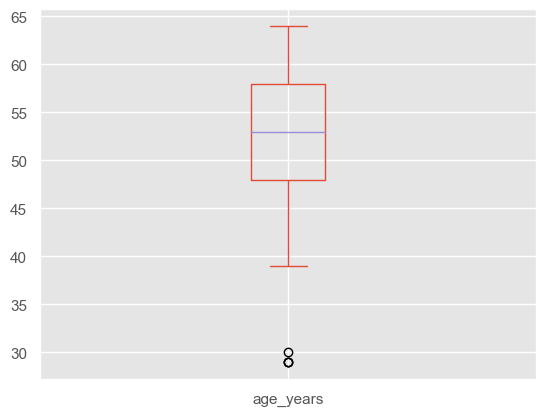

In [58]:
df['age_years'].plot(kind = 'box')

The median age is around 53 years. There are few outliers having age 29 and 30 respectively. The distribution can be better understood with help of a Histogram.

<h2>Histogram</h2>

<Axes: ylabel='Frequency'>

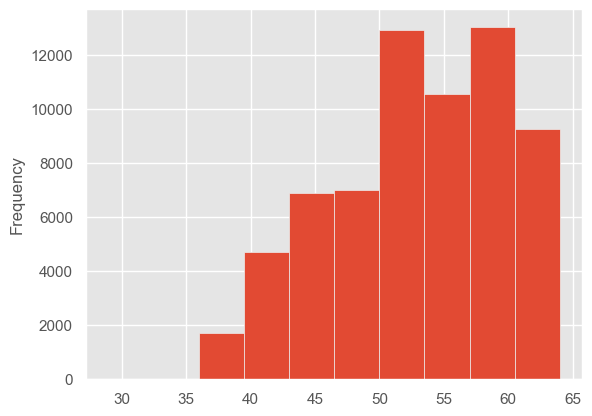

In [59]:
df['age_years'].plot(kind = 'hist')

This data is left skewed.

<h2>Pie Chart</h2>

Text(0.5, 1.0, 'Gender Distribution')

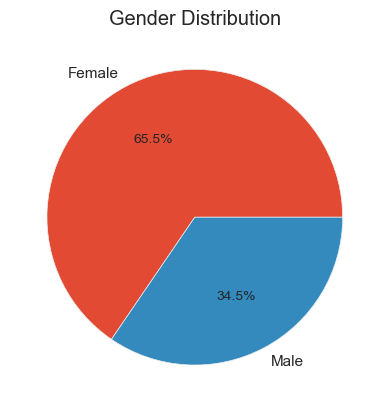

In [60]:
plt.pie(df['gender'].value_counts(), labels = ['Female', 'Male'],autopct='%1.1f%%')
plt.title('Gender Distribution')

There are more examples of females than males

Text(0.5, 1.0, 'Patient Distribution')

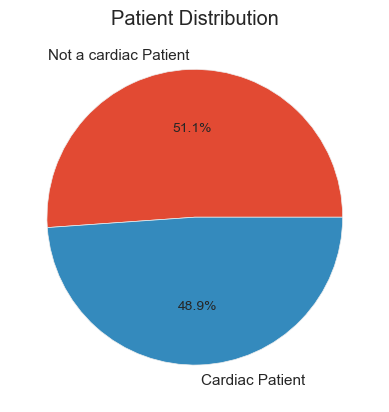

In [61]:
plt.pie(df['cardio'].value_counts(), labels = ['Not a cardiac Patient', 'Cardiac Patient'],autopct='%1.1f%%')
plt.title('Patient Distribution')

The number of positive and negative cases are nearly equal

<h1>Bivarate Analysis</h1>

<h2>Scatter Plot</h2>

Text(0.5, 1.0, 'age vs years w.r.t glucose level')

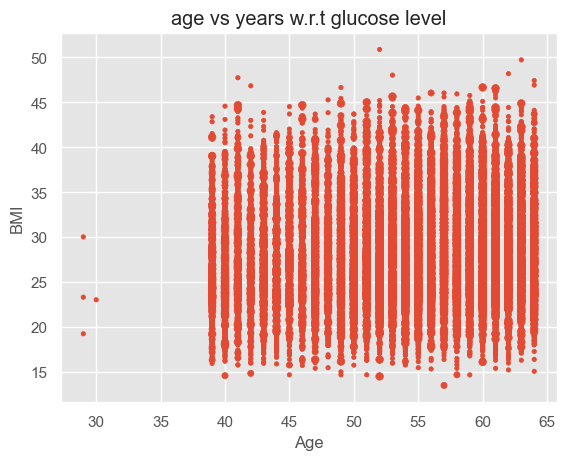

In [62]:
plt.scatter(df['age_years'], df['bmi'], s= df['Glucose_Level']*10)
plt.xlabel('Age')
plt.ylabel('BMI')
plt.title('age vs years w.r.t glucose level')

Since there is too much data, so these insights are not much clear.

<h2>Correlation Matrix</h2>

In [64]:
df.corr()

,gender,Systolic_BP,Diastolic_BP,cholesterol,Glucose_Level,smoke,alco,active,cardio,age_years,bmi
gender,1.000000,-0.059465,-0.064331,0.039293,0.023383,-0.338336,-0.169975,-0.006506,-0.003590,0.022259,0.126367
Systolic_BP,-0.059465,1.000000,0.730522,0.193065,0.086504,0.023694,0.029601,-0.000126,0.434138,0.215205,0.255175
Diastolic_BP,-0.064331,0.730522,1.000000,0.158486,0.067772,0.022588,0.033417,-0.000330,0.341859,0.160060,0.230190
cholesterol,0.039293,0.193065,0.158486,1.000000,0.449013,0.006716,0.032613,0.009073,0.219714,0.156438,0.167300
Glucose_Level,0.023383,0.086504,0.067772,0.449013,1.000000,-0.009736,0.006086,-0.007381,0.088327,0.098385,0.106243
smoke,-0.338336,0.023694,0.022588,0.006716,-0.009736,1.000000,0.339907,0.027882,-0.019577,-0.045387,-0.043148
alco,-0.169975,0.029601,0.033417,0.032613,0.006086,0.339907,1.000000,0.026323,-0.010675,-0.027731,0.012224
active,-0.006506,-0.000126,-0.000330,0.009073,-0.007381,0.027882,0.026323,1.000000,-0.038189,-0.011473,-0.011305
cardio,-0.003590,0.434138,0.341859,0.219714,0.088327,-0.019577,-0.010675,-0.038189,1.000000,0.242575,0.188074
age_years,0.022259,0.215205,0.160060,0.156438,0.098385,-0.045387,-0.027731,-0.011473,0.242575,1.000000,0.117167


<h2>Scatter Matrix</h2>

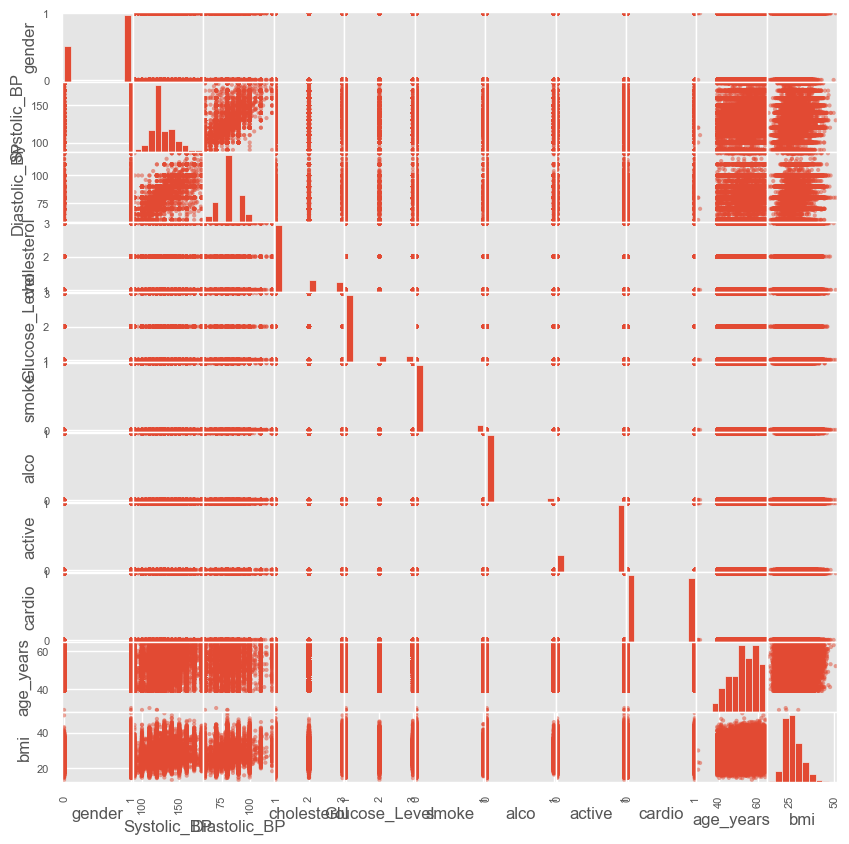

In [78]:
pd.plotting.scatter_matrix(df,figsize=(10, 10))
plt.show()

Using the above Scatter Plot, we can see that there is no strong relationship of the target feature 'cardio' with any of the other variables.

<h2>Heat Map</h2>

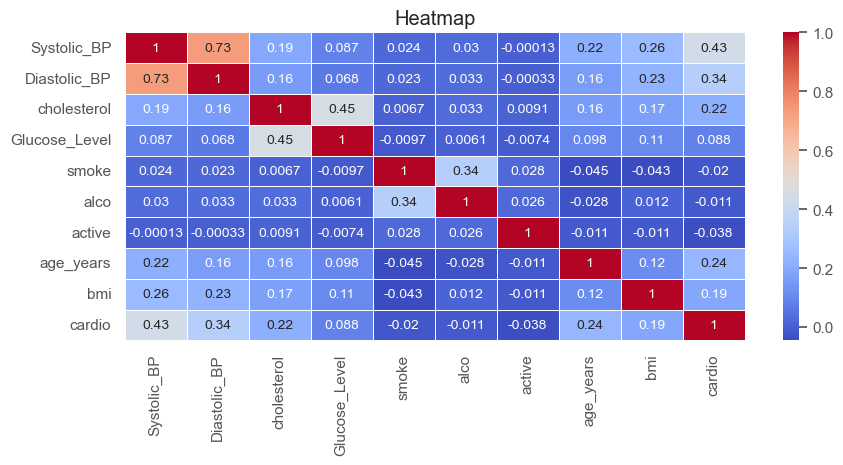

In [76]:
plt.figure(figsize=(10, 4))
sns.heatmap(df[['Systolic_BP', 'Diastolic_BP', 'cholesterol', 'Glucose_Level', 'smoke', 'alco', 'active', 'age_years', 'bmi', 'cardio']].corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Heatmap")
plt.show()

Using the above heat map and other insights, we can say that there is no variable which has a strong correlation with our target variable 'cardio'. However, we know that there is some realtion between the systolic and diastolic BPs.

<h3>Conclusion</h3>
<h4>We can conclude that the given data set is not very good for heart disease prediction since it does not have a strong correlation of the target variable "Cardio" with any of the rest of variables. However, weaker relations do exist and all such insights have been shown above. A short decription about each insight has also been written under it.</h4>

<h1>Project Final Phase</h1>

In [10]:
#import dataset
df = pd.read_csv('Final_Dataset.csv')   
df=df.drop("Unnamed: 0",axis=1)
df.head(3)

,gender,Systolic_BP,Diastolic_BP,cholesterol,Glucose_Level,smoke,alco,active,cardio,age_years,bmi
0,0,110,80,1,1,0,0,1,0,50,21.967120
1,1,140,90,3,1,0,0,1,1,55,34.927679
2,1,130,70,3,1,0,0,0,1,51,23.507805


<h2>Logistic Regression</h2>

Accuracy: 69.84%
Confusion Matrix:
[[4925 1681]
 [2304 4301]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71      6606
           1       0.72      0.65      0.68      6605

    accuracy                           0.70     13211
   macro avg       0.70      0.70      0.70     13211
weighted avg       0.70      0.70      0.70     13211

ROC/AUC Score: 75.84%


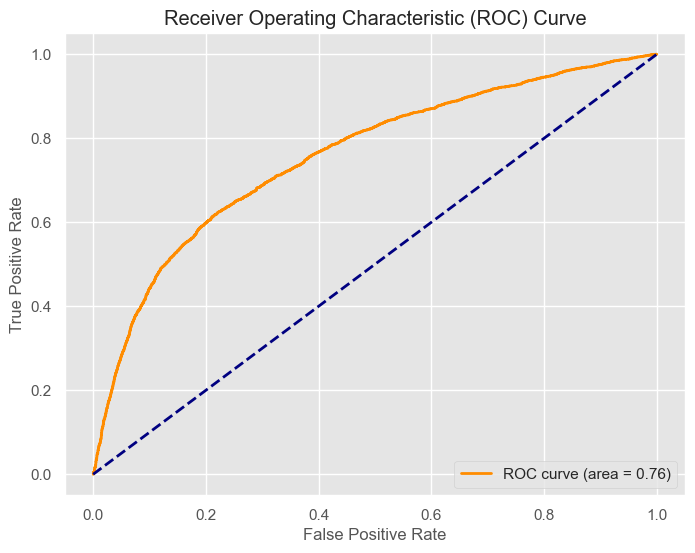

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
target = df["cardio"]
predictors = df.drop("cardio", axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)


# Initialize Logistic Regression model
lr = LogisticRegression()

# Train the model on the scaled data
lr.fit(X_train, Y_train)

# Predict using the test set
Y_pred_lr = lr.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_lr)
print(f"Accuracy: {accuracy:.2%}")

# Calculate loss (you may not have a straightforward loss for logistic regression, as it's used during training)
# loss = ... 

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lr)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
classification_rep = classification_report(Y_test, Y_pred_lr)
print("Classification Report:")
print(classification_rep)

# ROC/AUC
roc_auc = roc_auc_score(Y_test, lr.predict_proba(X_test)[:, 1])
print(f"ROC/AUC Score: {roc_auc:.2%}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, lr.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h2>Artificial Neural Network</h2>

Epoch 1/10


1321/1321 [==============================] - 5s 3ms/step - loss: 0.7261 - accuracy: 0.5732 - val_loss: 0.6577 - val_accuracy: 0.5920
Epoch 2/10
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6637 - accuracy: 0.6169 - val_loss: 0.6296 - val_accuracy: 0.6582
Epoch 3/10
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6427 - accuracy: 0.6342 - val_loss: 0.6178 - val_accuracy: 0.6773
Epoch 4/10
1321/1321 [==============================] - 3s 3ms/step - loss: 0.6333 - accuracy: 0.6445 - val_loss: 0.8171 - val_accuracy: 0.4921
Epoch 5/10
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6258 - accuracy: 0.6532 - val_loss: 0.6077 - val_accuracy: 0.6766
Epoch 6/10
1321/1321 [==============================] - 3s 3ms/step - loss: 0.6142 - accuracy: 0.6685 - val_loss: 0.6046 - val_accuracy: 0.6906
Epoch 7/10
1321/1321 [==============================] - 3s 2ms/step - loss: 0.6123 - accuracy: 0.6699 - val_loss: 0.6171 - val_accurac

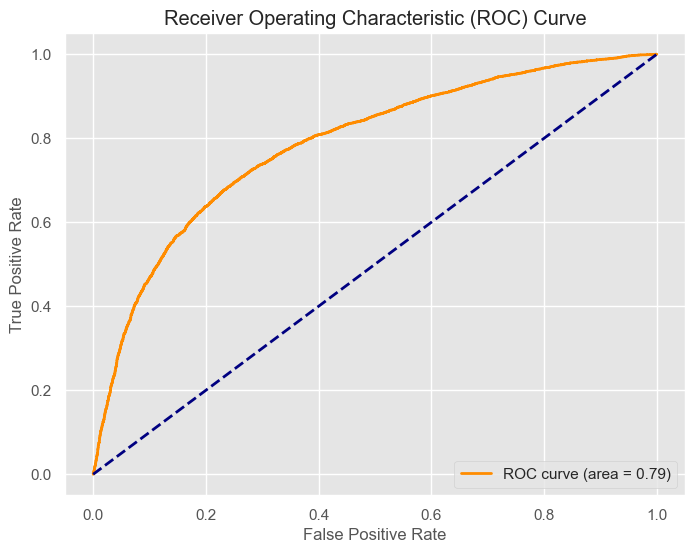

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming df is your DataFrame
target = df["cardio"]
predictors = df.drop("cardio", axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

# Build the Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)

# Predict using the test set
Y_pred_nn = model.predict(X_test)
Y_pred_nn = (Y_pred_nn > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_nn)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
classification_rep = classification_report(Y_test, Y_pred_nn)
print("Classification Report:")
print(classification_rep)

# ROC/AUC
roc_auc = roc_auc_score(Y_test, model.predict(X_test))
print(f"ROC/AUC Score: {roc_auc:.2%}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, model.predict(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h2>ANN with more epochs</h2>

Epoch 1/20
1321/1321 [==============================] - 7s 4ms/step - loss: 0.6874 - accuracy: 0.5827 - val_loss: 0.6539 - val_accuracy: 0.6039
Epoch 2/20
1321/1321 [==============================] - 5s 4ms/step - loss: 0.6443 - accuracy: 0.6293 - val_loss: 0.6266 - val_accuracy: 0.6587
Epoch 3/20
1321/1321 [==============================] - 5s 4ms/step - loss: 0.6262 - accuracy: 0.6538 - val_loss: 0.6138 - val_accuracy: 0.6783
Epoch 4/20
1321/1321 [==============================] - 6s 4ms/step - loss: 0.6111 - accuracy: 0.6756 - val_loss: 0.6001 - val_accuracy: 0.6818
Epoch 5/20
1321/1321 [==============================] - 5s 4ms/step - loss: 0.5982 - accuracy: 0.6910 - val_loss: 0.6047 - val_accuracy: 0.6819
Epoch 6/20
1321/1321 [==============================] - 5s 4ms/step - loss: 0.5876 - accuracy: 0.7011 - val_loss: 0.5773 - val_accuracy: 0.7211
Epoch 7/20
1321/1321 [==============================] - 5s 4ms/step - loss: 0.5776 - accuracy: 0.7121 - val_loss: 0.5709 - val_accuracy:

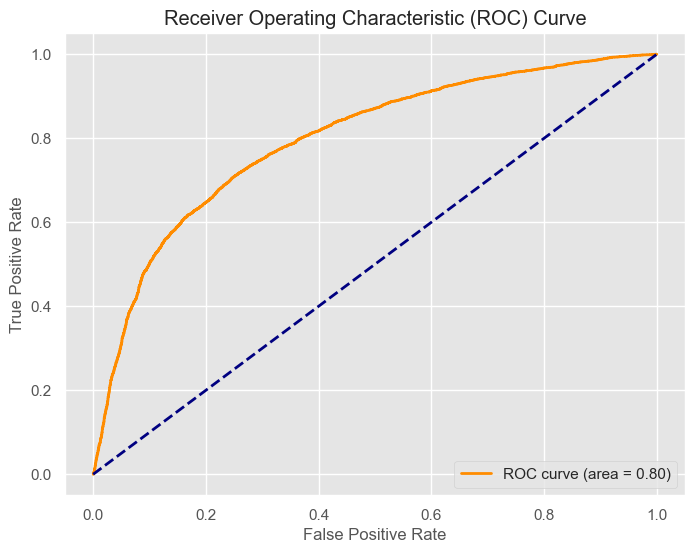

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming df is your DataFrame
target = df["cardio"]
predictors = df.drop("cardio", axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

# Build the Neural Network
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, Y_train, epochs=20, batch_size=32, validation_split=0.2)

# Predict using the test set
Y_pred_nn = model.predict(X_test)
Y_pred_nn = (Y_pred_nn > 0.5).astype(int)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_nn)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_nn)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
classification_rep = classification_report(Y_test, Y_pred_nn)
print("Classification Report:")
print(classification_rep)

# ROC/AUC
roc_auc = roc_auc_score(Y_test, model.predict(X_test))
print(f"ROC/AUC Score: {roc_auc:.2%}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, model.predict(X_test))
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h2>Lasso</h2>

Accuracy: 72.07%
Confusion Matrix:
[[5356 1250]
 [2440 4165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      6606
           1       0.77      0.63      0.69      6605

    accuracy                           0.72     13211
   macro avg       0.73      0.72      0.72     13211
weighted avg       0.73      0.72      0.72     13211

ROC/AUC Score: 79.13%


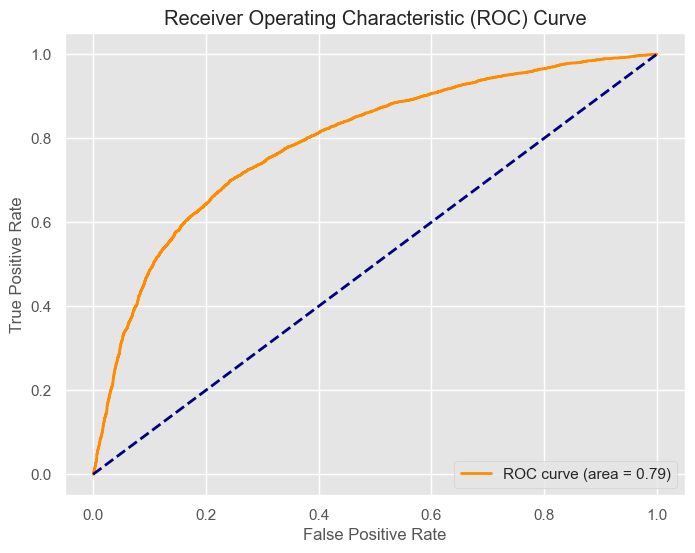

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Lasso
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
target = df["cardio"]
predictors = df.drop("cardio", axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

# Initialize Lasso Regression model with adjustable alpha
alpha_value = 0.00001  # Adjust alpha as needed
lasso_model = Lasso(alpha=alpha_value)

# Train the model
lasso_model.fit(X_train, Y_train)

# Predict using the test set
Y_pred_lasso = lasso_model.predict(X_test)
Y_pred_lasso_class = [1 if pred > 0.5 else 0 for pred in Y_pred_lasso]

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_lasso_class)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_lasso_class)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
classification_rep = classification_report(Y_test, Y_pred_lasso_class)
print("Classification Report:")
print(classification_rep)

# ROC/AUC
roc_auc = roc_auc_score(Y_test, Y_pred_lasso)
print(f"ROC/AUC Score: {roc_auc:.2%}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_lasso)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h2>Ridge</h2>

Accuracy: 72.07%
Confusion Matrix:
[[5356 1250]
 [2440 4165]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.81      0.74      6606
           1       0.77      0.63      0.69      6605

    accuracy                           0.72     13211
   macro avg       0.73      0.72      0.72     13211
weighted avg       0.73      0.72      0.72     13211

ROC/AUC Score: 79.13%


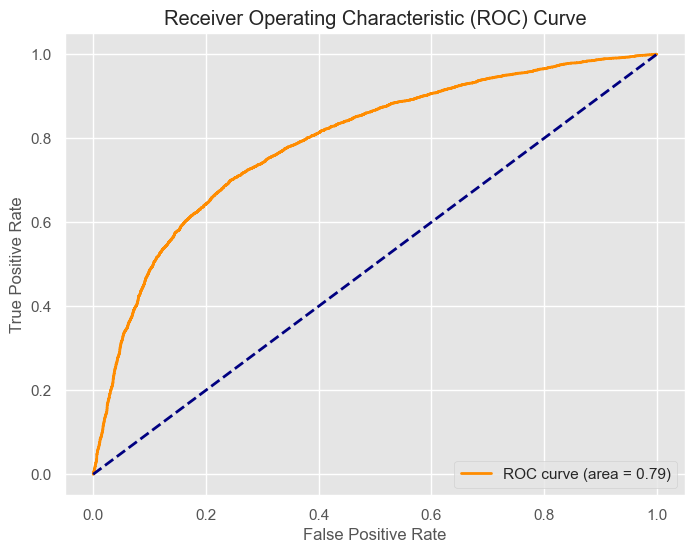

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
target = df["cardio"]
predictors = df.drop("cardio", axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

# Initialize Ridge Regression model with adjustable alpha
alpha_value = 0.1  # Adjust alpha as needed
ridge_model = Ridge(alpha=alpha_value)

# Train the model
ridge_model.fit(X_train, Y_train)

# Predict using the test set
Y_pred_ridge = ridge_model.predict(X_test)
Y_pred_ridge_class = [1 if pred > 0.5 else 0 for pred in Y_pred_ridge]

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_ridge_class)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_ridge_class)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
classification_rep = classification_report(Y_test, Y_pred_ridge_class)
print("Classification Report:")
print(classification_rep)

# ROC/AUC
roc_auc = roc_auc_score(Y_test, Y_pred_ridge)
print(f"ROC/AUC Score: {roc_auc:.2%}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_ridge)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

<h2>Random Forest</h2>

Accuracy: 68.37%
Confusion Matrix:
[[4622 1984]
 [2194 4411]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.70      0.69      6606
           1       0.69      0.67      0.68      6605

    accuracy                           0.68     13211
   macro avg       0.68      0.68      0.68     13211
weighted avg       0.68      0.68      0.68     13211

ROC/AUC Score: 74.14%


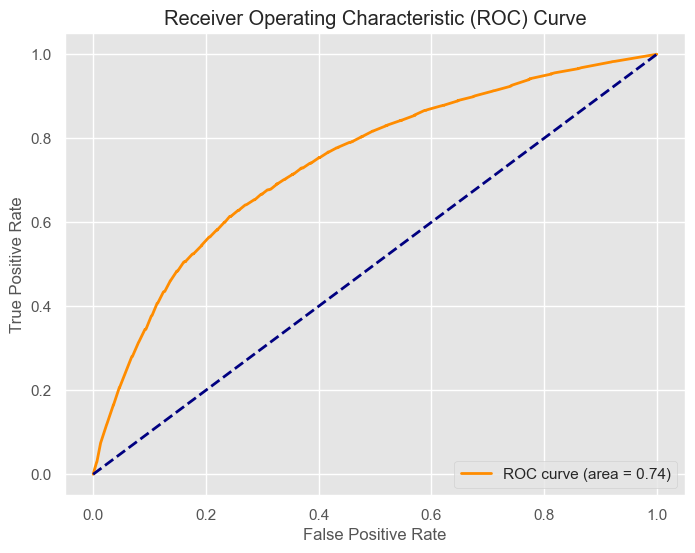

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
target = df["cardio"]
predictors = df.drop("cardio", axis=1)

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size=0.20, random_state=42)

# Initialize Random Forest model
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)  # You can adjust n_estimators as needed

# Train the model
rf_model.fit(X_train, Y_train)

# Predict using the test set
Y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred_rf)
print(f"Accuracy: {accuracy:.2%}")

# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred_rf)
print("Confusion Matrix:")
print(conf_matrix)

# Precision, Recall, F1 Score
classification_rep = classification_report(Y_test, Y_pred_rf)
print("Classification Report:")
print(classification_rep)

# ROC/AUC
roc_auc = roc_auc_score(Y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"ROC/AUC Score: {roc_auc:.2%}")

# Plot ROC Curve
fpr, tpr, _ = roc_curve(Y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


<h1>We can see the best performance is given by LASSO Model. So it has been saved for future use.</h1>

<h1>GUI</h1>

In [51]:
import joblib
model=lr
joblib.dump(model, 'lasso_model.pkl')

['lasso_model.pkl']

In [18]:
# GUI
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

class MLApp:
    def __init__(self, root):
        self.root = root
        self.root.title("ML Model GUI")

        # Load the machine learning model
        self.model = joblib.load('logistic_regression_model.pkl')

        # Create GUI elements
        self.labels = []
        self.entries = []

        # Creating labels and entry boxes dynamically
        feature_names = ["Gender -> 0:M| 1:F ", "Systolic BP ", "Diastolic BP ", "Cholesterol -> 1:L|2:M|3:H ", "Glucose Level -> 1:L|2:M|3:H ", "Smoke -> 1:Y|0:N ", "Alcohol -> 1:Y|0:N ", "Active -> 1:Y|0:N ", "Age Years ", "BMI "]
        for feature_name in feature_names:
            label = tk.Label(root, text=f"{feature_name}:")
            label.pack()
            self.labels.append(label)

            entry = tk.Entry(root)
            entry.pack()
            self.entries.append(entry)

        self.predict_button = tk.Button(root, text="Predict", command=self.predict)
        self.predict_button.pack()

    def predict(self):
        # Get user input from all entry boxes
        user_inputs = [entry.get() for entry in self.entries]

        # Perform some preprocessing if needed
        # For simplicity, assuming all inputs are float
        features = np.array([float(x) for x in user_inputs])

        # Make a prediction
        prediction = self.model.predict([features])

        # Display the prediction
        if prediction[0]==0:
            messagebox.showinfo("Prediction", f"The model predicts PRESENCE of heart disease.")
        else:
            messagebox.showinfo("Prediction", f"The model predicts ABSENCE of heart disease.")
if __name__ == "__main__":
    root = tk.Tk()
    app = MLApp(root)
    root.mainloop()